# Doubly Linked List (DLL) in Python
This notebook demonstrates the implementation of a **Doubly Linked List** in Python.
A Doubly Linked List is a data structure where each node contains:
- `value`: the data
- `next`: pointer to the next node
- `prev`: pointer to the previous node


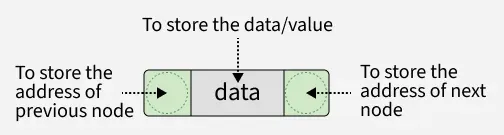

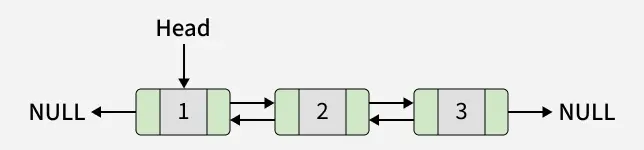

In [1]:
# Node class for Doubly Linked List
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
        self.prev = None

    def __str__(self):
        return str(self.value)


## Explanation:
- `Node` class represents each element in the DLL.
- `value`: stores the data.
- `next`: points to the next node in the list.
- `prev`: points to the previous node.
- `__str__` method returns the value as a string for printing.


In [2]:
# Doubly Linked List class
class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

    def __str__(self):
        temp_node = self.head
        result = ''
        while temp_node:
            result += str(temp_node.value)
            if temp_node.next:
                result += ' <-> '
            temp_node = temp_node.next
        return result


### Explanation:
- `head`: points to the first node.
- `tail`: points to the last node.
- `length`: tracks the number of nodes in the list.
- `__str__`: prints the list in `value1 <-> value2 <-> value3` format.


In [3]:
# Append and Prepend Methods
def append(self, value):
    new_node = Node(value)
    if not self.head:
        self.head = new_node
        self.tail = new_node
    else:
        self.tail.next = new_node
        new_node.prev = self.tail
        self.tail = new_node
    self.length += 1

def prepend(self, value):
    new_node = Node(value)
    if not self.head:
        self.head = new_node
        self.tail = new_node
    else:
        new_node.next = self.head
        self.head.prev = new_node
        self.head = new_node
    self.length += 1

DoublyLinkedList.append = append
DoublyLinkedList.prepend = prepend


### Explanation:
- **append(value)**: Adds a node at the end.
  - If empty, `head` and `tail` point to the new node.
  - Otherwise, adjust pointers (`tail.next` and `new_node.prev`) and update `tail`.
- **prepend(value)**: Adds a node at the start.
  - If empty, `head` and `tail` point to the new node.
  - Otherwise, adjust pointers (`head.prev` and `new_node.next`) and update `head`.


In [4]:
# Traverse and Reverse Traverse
def traverse(self):
    current_node = self.head
    while current_node:
        print(current_node.value, end=' ')
        current_node = current_node.next
    print()

def reverse_traverse(self):
    current_node = self.tail
    while current_node:
        print(current_node.value, end=' ')
        current_node = current_node.prev
    print()

DoublyLinkedList.traverse = traverse
DoublyLinkedList.reverse_traverse = reverse_traverse


### Explanation:
- **traverse()**: Moves from head to tail, printing each value.
- **reverse_traverse()**: Moves from tail to head, printing each value.


In [5]:
# Search, Get, and Set Value
def search(self, target):
    current_node = self.head
    index = 0
    while current_node:
        if current_node.value == target:
            return index
        current_node = current_node.next
        index += 1
    return -1

def get(self, index):
    if index < 0 or index >= self.length:
        return None
    if index < self.length // 2:
        current_node = self.head
        for _ in range(index):
            current_node = current_node.next
    else:
        current_node = self.tail
        for _ in range(self.length - 1, index, -1):
            current_node = current_node.prev
    return current_node

def set_value(self, index, value):
    node = self.get(index)
    if node:
        node.value = value
        return True
    return False

DoublyLinkedList.search = search
DoublyLinkedList.get = get
DoublyLinkedList.set_value = set_value


### Explanation:
- **search(target)**: Returns index of the first node with value `target`, else -1.
- **get(index)**: Returns the node at `index`. Optimized to traverse from head or tail depending on index.
- **set_value(index, value)**: Sets node's value at `index` to `value`. Returns True if successful.


In [6]:
# Insert, Pop, Remove, Delete All
def insert(self, index, value):
    if index < 0 or index > self.length:
        print("Error: Index out of bounds.")
        return
    if index == 0:
        self.prepend(value)
        return
    elif index == self.length:
        self.append(value)
        return
    new_node = Node(value)
    temp_node = self.get(index-1)
    new_node.next = temp_node.next
    new_node.prev = temp_node
    temp_node.next.prev = new_node
    temp_node.next = new_node
    self.length += 1

def pop_first(self):
    if not self.head:
        return None
    popped_node = self.head
    if self.length == 1:
        self.head = None
        self.tail = None
    else:
        self.head = self.head.next
        self.head.prev = None
        popped_node.next = None
    self.length -= 1
    return popped_node

def pop(self):
    if not self.tail:
        return None
    popped_node = self.tail
    if self.length == 1:
        self.head = None
        self.tail = None
    else:
        self.tail = self.tail.prev
        self.tail.next = None
        popped_node.prev = None
    self.length -= 1
    return popped_node

def remove(self, index):
    if index < 0 or index >= self.length:
        return None
    if index == 0:
        return self.pop_first()
    if index == self.length-1:
        return self.pop()
    popped_node = self.get(index)
    popped_node.prev.next = popped_node.next
    popped_node.next.prev = popped_node.prev
    popped_node.prev = None
    popped_node.next = None
    self.length -= 1
    return popped_node

def delete_all(self):
    self.head = None
    self.tail = None
    self.length = 0

DoublyLinkedList.insert = insert
DoublyLinkedList.pop_first = pop_first
DoublyLinkedList.pop = pop
DoublyLinkedList.remove = remove
DoublyLinkedList.delete_all = delete_all


### Explanation:
- **insert(index, value)**: Inserts a node at a specific index.
- **pop_first()**: Removes and returns the first node.
- **pop()**: Removes and returns the last node.
- **remove(index)**: Removes a node at a specific index.
- **delete_all()**: Clears the entire list.


In [7]:
# Testing the Doubly Linked List
dll = DoublyLinkedList()
dll.prepend(5)
dll.prepend(44)
dll.append(10)
dll.insert(1, 99)

print("DLL:", dll)              # Prints full list
dll.traverse()                  # Traverse forward
dll.reverse_traverse()          # Traverse backward
print("Search 99:", dll.search(99))
dll.set_value(1, 55)
print("After set_value:", dll)
dll.pop_first()
dll.pop()
dll.remove(1)
print("After pops and remove:", dll)
dll.delete_all()
print("After delete_all:", dll)


DLL: 44 <-> 99 <-> 5 <-> 10
44 99 5 10 
10 5 99 44 
Search 99: 1
After set_value: 44 <-> 55 <-> 5 <-> 10
After pops and remove: 55
After delete_all: 
